In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [218]:
df = pd.read_csv('data.csv')
df

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will Ã¼ b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [219]:
df['message_length'] = df['message'].apply(len)
df

,label,message,message_length
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,148
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,161
5569,ham,Will Ã¼ b going to esplanade fr home?,37
5570,ham,"Pity, * was in mood for that. So...any other s...",57
5571,ham,The guy did some bitching but I acted like i'd...,125


In [220]:
import string

def count_non_alnum_symbols(message):
    non_alnum_count = 0

    for char in message:
        if not char.isalnum() and char not in string.whitespace:
            non_alnum_count += 1

    return non_alnum_count


In [221]:
df['count'] = df['message'].apply(lambda x: count_non_alnum_symbols(x))

In [222]:
df

,label,message,message_length,count
0,ham,Ok lar... Joking wif u oni...,29,6
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,spam,FreeMsg Hey there darling it's been 3 week's n...,148,9
...,...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,161,9
5569,ham,Will Ã¼ b going to esplanade fr home?,37,1
5570,ham,"Pity, * was in mood for that. So...any other s...",57,7
5571,ham,The guy did some bitching but I acted like i'd...,125,1


In [223]:
vectorizer = CountVectorizer()

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           5573 non-null   object
 1   message         5573 non-null   object
 2   message_length  5573 non-null   int64 
 3   count           5573 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


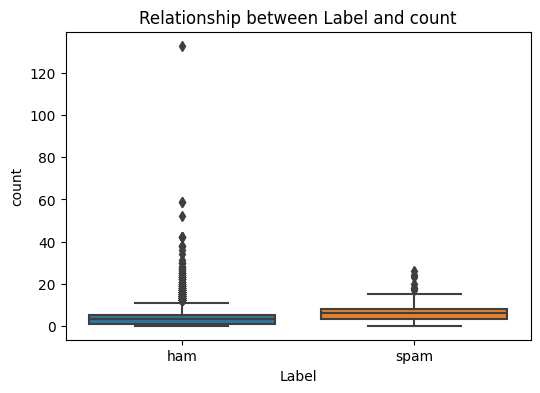

In [225]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='count', data=df)
plt.xlabel('Label')
plt.ylabel('count')
plt.title('Relationship between Label and count')
plt.show()

In [226]:
min = df['count'].min()
max = df['count'].max()
print(min)
print(max)
print("Upper limit",df['count'].mean() + 3*df['count'].std())
print("Lower limit",df['count'].mean() - 3*df['count'].std())
s = df['count'].describe()
a = df['count'].mean()
b = df['count'].std()
df['zscore'] = (df['count'] - a)/b

0
133
Upper limit 18.238203914245137
Lower limit -9.699535333588397


In [227]:
df = df.loc[(abs(df['zscore']))<1]

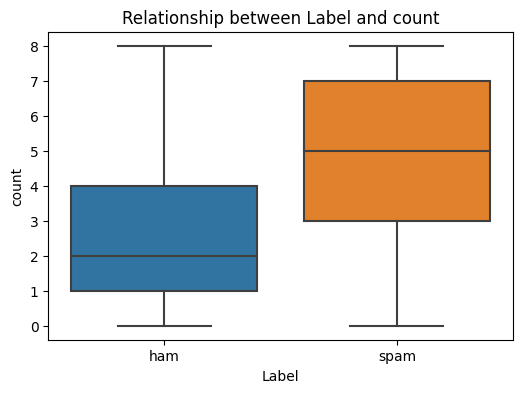

In [228]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='count', data=df)
plt.xlabel('Label')
plt.ylabel('count')
plt.title('Relationship between Label and count')
plt.show()

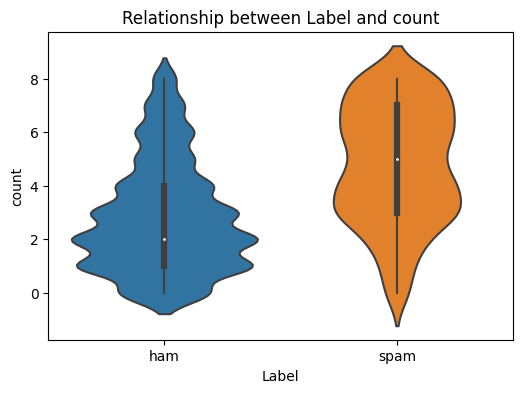

In [229]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='label', y='count', data=df)
plt.xlabel('Label')
plt.ylabel('count')
plt.title('Relationship between Label and count')
plt.show()

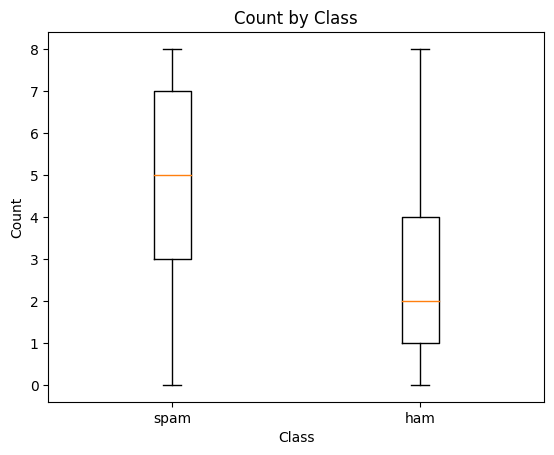

In [230]:
plt.boxplot([df[df['label']=='spam']['count'],
             df[df['label']=='ham']['count']])
plt.xticks([1, 2], ['spam', 'ham'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count by Class')
plt.show()

<ipython-input-231-686d320c98a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_length'] = df['message'].apply(len)


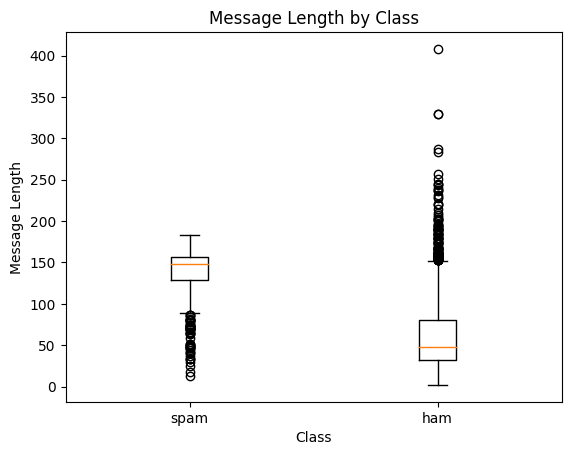

In [231]:
df['message_length'] = df['message'].apply(len)
plt.boxplot([df[df['label']=='spam']['message_length'],
             df[df['label']=='ham']['message_length']])
plt.xticks([1, 2], ['spam', 'ham'])
plt.xlabel('Class')
plt.ylabel('Message Length')
plt.title('Message Length by Class')
plt.show()

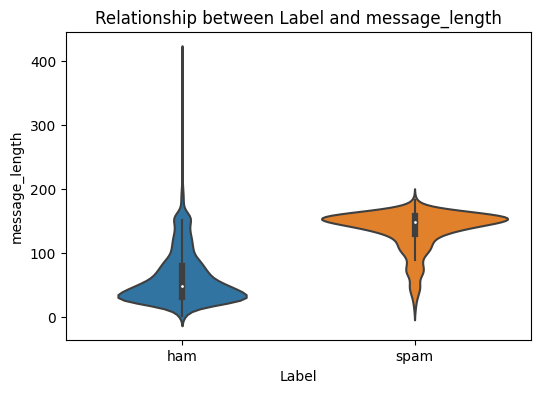

In [232]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='label', y='message_length', data=df)
plt.xlabel('Label')
plt.ylabel('message_length')
plt.title('Relationship between Label and message_length')
plt.show()

In [233]:
min = df['message_length'].min()
max = df['message_length'].max()
print(min)
print(max)
print("Upper limit",df['message_length'].mean() + 3*df['message_length'].std())
print("Lower limit",df['message_length'].mean() - 3*df['message_length'].std())
s = df['message_length'].describe()
a = df['message_length'].mean()
b = df['message_length'].std()
df['zscore'] = (df['message_length'] - a)/b

2
408
Upper limit 210.9875978149814
Lower limit -70.22522762561059


<ipython-input-233-da9afcbb3c1f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = (df['message_length'] - a)/b


In [234]:
df = df.loc[(abs(df['zscore']))<1]

<ipython-input-235-686d320c98a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_length'] = df['message'].apply(len)


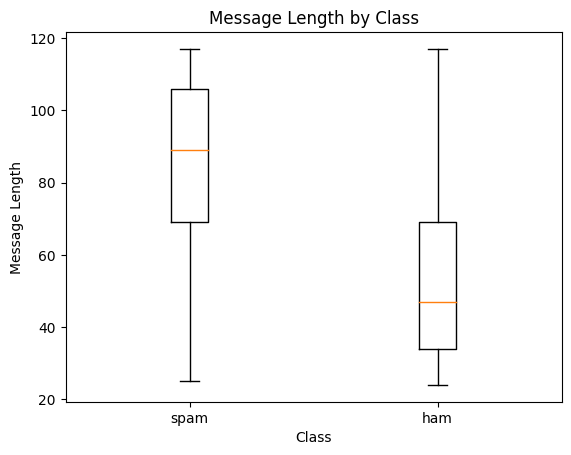

In [235]:
df['message_length'] = df['message'].apply(len)
plt.boxplot([df[df['label']=='spam']['message_length'],
             df[df['label']=='ham']['message_length']])
plt.xticks([1, 2], ['spam', 'ham'])
plt.xlabel('Class')
plt.ylabel('Message Length')
plt.title('Message Length by Class')
plt.show()

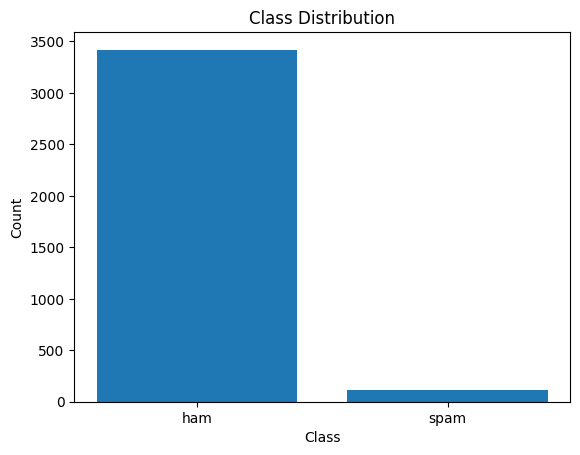

In [236]:
class_counts = df['label'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [237]:
df

,label,message,message_length,count,zscore
0,ham,Ok lar... Joking wif u oni...,29,6,-0.882915
2,ham,U dun say so early hor... U c already then say...,49,6,-0.456192
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,-0.200158
5,ham,Even my brother is not like to speak with me. ...,77,2,0.141220
9,ham,I'm gonna be home soon and i don't want to tal...,109,6,0.823977
...,...,...,...,...,...
5562,ham,Get me out of this dump heap. My mom decided t...,70,3,-0.008133
5565,ham,Why don't you wait 'til at least wednesday to ...,67,3,-0.072141
5569,ham,Will Ã¼ b going to esplanade fr home?,37,1,-0.712226
5570,ham,"Pity, * was in mood for that. So...any other s...",57,7,-0.285503


In [238]:
df = df.drop('zscore', axis=1)
df

,label,message,message_length,count
0,ham,Ok lar... Joking wif u oni...,29,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,ham,Even my brother is not like to speak with me. ...,77,2
9,ham,I'm gonna be home soon and i don't want to tal...,109,6
...,...,...,...,...
5562,ham,Get me out of this dump heap. My mom decided t...,70,3
5565,ham,Why don't you wait 'til at least wednesday to ...,67,3
5569,ham,Will Ã¼ b going to esplanade fr home?,37,1
5570,ham,"Pity, * was in mood for that. So...any other s...",57,7


In [239]:
x = df[['message_length', 'count']]
y = df['label']

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [241]:
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Hence the Accuracy of the designed model happens to be: {acc*100} %")

Hence the Accuracy of the designed model happens to be: 97.31258840169731 %


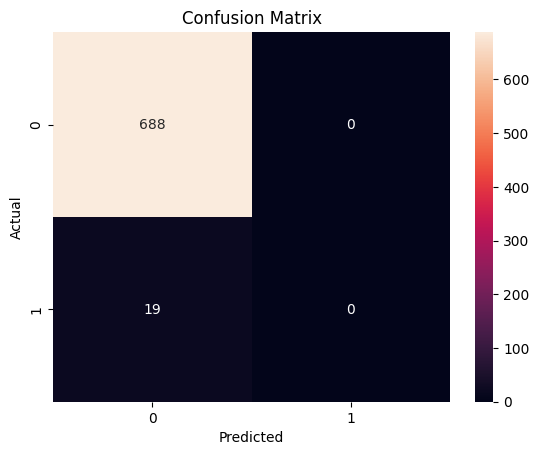

In [242]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [243]:
tp = cm[1, 1]  # True Positive
tn = cm[0, 0]  # True Negative
fp = cm[0, 1]  # False Positive
fn = cm[1, 0]  # False Negative

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print('Accuracy:', accuracy*100)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)

Accuracy: 97.31258840169731
Precision: 0
Recall: 0.0
F1-Score: 0
